In [56]:
import pandas as pd
import time
import datetime

def read_from_file(file_path):
    df = pd.read_csv(file_path, parse_dates=["date"], skiprows=1)
    df = df.rename(columns={
        df.columns[-2]: "volume_crypto",
        df.columns[-1]: "volume_usd"
    })
    return df

In [57]:
import os

root_path = "/content/airflow/assets"
file_names = os.listdir(root_path)
data = {}
for file_name in file_names:
    data[file_name] = read_from_file(f"{root_path}/{file_name}")

0       2023-10-02 11:00:00
1       2023-10-01 22:00:00
2       2023-10-01 10:00:00
3       2023-09-30 07:00:00
4       2023-09-28 14:00:00
                ...        
42598   2017-08-03 21:00:00
42599   2017-08-03 20:00:00
42600   2017-08-03 19:00:00
42601   2017-08-03 18:00:00
42602   2017-08-03 17:00:00
Name: date, Length: 42603, dtype: datetime64[ns]
0       2023-10-02 23:00:00
1       2023-10-02 22:00:00
2       2023-10-02 21:00:00
3       2023-10-02 20:00:00
4       2023-10-02 19:00:00
                ...        
30872   2019-12-12 17:00:00
30873   2019-12-12 16:00:00
30874   2019-12-12 15:00:00
30875   2019-12-12 14:00:00
30876   2019-12-12 13:00:00
Name: date, Length: 30877, dtype: datetime64[ns]
0       2023-09-16 02:00:00
1       2023-09-11 10:00:00
2       2023-09-11 09:00:00
3       2023-09-10 19:00:00
4       2023-09-06 17:00:00
                ...        
11498   2021-04-21 14:00:00
11499   2021-04-21 13:00:00
11500   2021-04-21 12:00:00
11501   2021-04-21 11:00:00
11502 

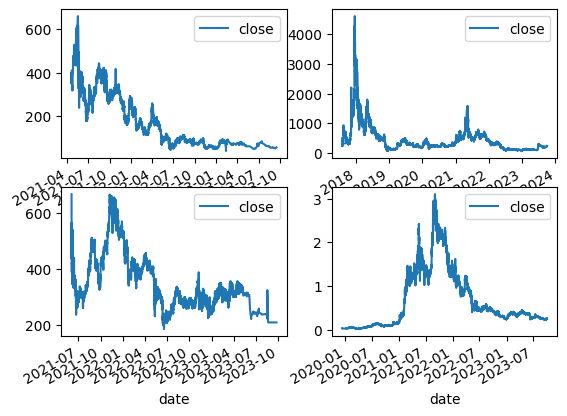

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def _get_figure_index(x, y, nrows, ncols):
    if x < ncols-1:
      return x + 1, y
    else:
     return 0, y + 1

nrows=2
ncols=2
x = -1
y = -1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

for k,v in data.items():
  x, y = _get_figure_index(x, y, nrows, ncols)
  v.plot(ax=axes[x, y], x="date", y="close")

plt.legend()
plt.show()

In [88]:
! pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
# https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html

from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10, random_state=42)
model.fit(....)